# Notebook copied from Skillman at KIPAC

In [1]:
# I am a cell. I probably remind you of Mathematica or Maple, but I'm much cooler.

# Ctrl-Enter executes me

print ('Hello World, er, classroom.')

Hello World, er, classroom.


# I have lots of useful keyboard shortcuts that you'll learn fairly quickly. Here are a few useful ones.

Ctrl-m h : Show the keyboard shortcuts
Ctrl-m b : Create a new cell *b*elow me
Ctrl-m a : Create a new cell *a*bove me
Ctrl-m i : Interupt the kernel
Ctrl-m p : Move focus to the previous cell
Ctrl-m n : Move focus to the next cell

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Setup matplotlib plotting to use an "inline" backend.
%matplotlib inline

In [3]:
# Quick refresher for numpy operations

# Create an empty array of zeros
a = np.zeros(10)

# Create an empty array of ones with the same shape:
b = np.ones_like(a)

print (a)
print (b)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [4]:
# %%timeit to time looping in Python vs Numpy

N = 1000000
a = np.random.random(N)
b = np.empty_like(a)

# Here we are going to use a "magic" function from IPython to time a function. 
# Check out the docs for %%timeit for more information. 
# Just put %%timeit at the very top of a cell, then execute the cell as normal. 
# It will run the cell (sometimes many times to get an average) and print out the timing.

In [5]:
%%timeit
#This explicitly creates an "i" list with length N [0,1,2,....N-1], then iterates
for i in range(N): 
    b[i] = a[i]**2.0

1 loop, best of 3: 310 ms per loop


In [6]:
%%ignore
%%timeit
# This uses xrange, which is an iterator that does something 
# more like (for i=0; i<N; i++), but still slow to index
for i in xrange(N): 
    b[i] = a[i]**2.0

ERROR: Cell magic `%%ignore` not found.


In [7]:
%%timeit
# This uses Numpy's internal array operation (in C), and is thus ~1000 times faster!
b = a**2.0

100 loops, best of 3: 3.77 ms per loop


In [8]:
# Numpy Indexing is your friend

N = 10
a = np.arange(N)

a[:] # All indices (0, 1, 2,..,N-2, N-1)
a[1:] # (1, 2,...,N-2, N-1)
a[:-1] # (0, 1, 2, .. N-2)

# Rolling average stencil b[i] = (b[i-1] + b[i] + b[i+1])/3.
b = np.zeros_like(a)
b[1:-1] = (a[:-2] + a[1:-1] + a[2:])/3.
print('a:', a)
print('b:', b)

a: [0 1 2 3 4 5 6 7 8 9]
b: [0 1 2 3 4 5 6 7 8 0]


In [9]:
N = 10000
a = np.arange(N)
b = np.zeros_like(a)
c = np.zeros_like(a)

%timeit for i in range(1, N-1): b[i] = (a[i-1] + a[i] + a[i+1])/3. 
    
%timeit c[1:-1] = (a[:-2] + a[1:-1] + a[2:])/3.

print ('Same answer: ', np.all(b == c))

10 loops, best of 3: 27.9 ms per loop
10000 loops, best of 3: 59.6 µs per loop
Same answer:  True


In [10]:
print (60e-3/125e-6)

480.0


# Some useful IPython Notebook Magic

In [11]:
%%latex
$$a = \int_a^b f(\alpha) d \alpha$$

<IPython.core.display.Latex object>

### Or you can put it in a Markdown cell. 
### Just put "2 dollar signs" at the start and end of the equation.
$$a=\int^b_a f(\alpha) d \alpha$$

$$a = \int_a^b f(\alpha) d \alpha$$

In [12]:
# Debugging. Most important feature: pdb Python Debugger

N = 100
a = np.random.random(N)
b = (a[1:] + a[:-1])/2.

c = a * b a

SyntaxError: invalid syntax (<ipython-input-12-4618ae75cac0>, line 7)

In [ ]:
%debug

In [ ]:
# Plotting Inline

plt.plot(np.arange(10))
plt.xlabel('xlabel')


# Display an image inline

#### Sometimes this is easy, with matplotlib plots


In [ ]:
xx, yy = np.mgrid[0:256,0:256]/256.

In [ ]:
fig = plt.figure(figsize=(8.0,8.0))

plt.imshow(np.sin(xx) + np.tan(yy), cmap='Spectral')
plt.savefig('test.png', bbox_inches='tight')

In [ ]:
# But if you want to display an image you have already made, you need to import a tool from the IPython core
from IPython.core.display import Image 
Image(filename='test.png') 

# Animation in the Browser

Install JSAnimation: https://github.com/jakevdp/JSAnimation

# Make sure you have Anaconda activated if you use it.
Two ways: git or static snapshot
git clone https://github.com/jakevdp/JSAnimation
cd JSAnimation
python setup.py install

or 

curl -O https://github.com/jakevdp/JSAnimation/archive/master.zip
unzip it
cd JSAnimation-master
python setup.py install

The following example is taken from 
http://nbviewer.ipython.org/urls/raw.github.com/jakevdp/JSAnimation/master/animation_example.ipynb



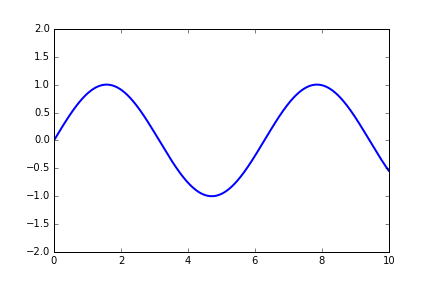
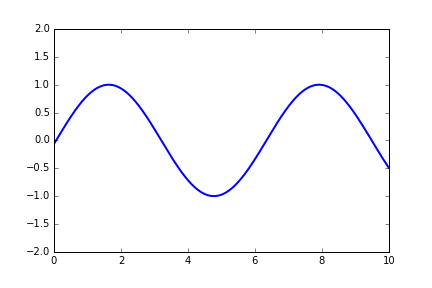
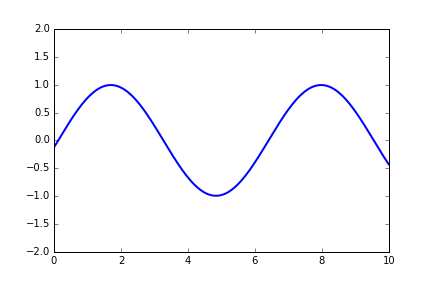
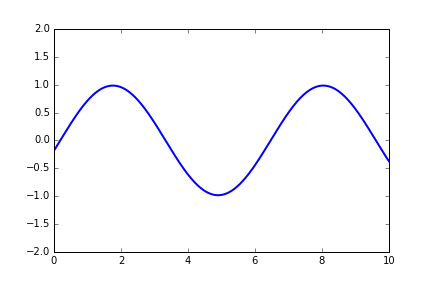
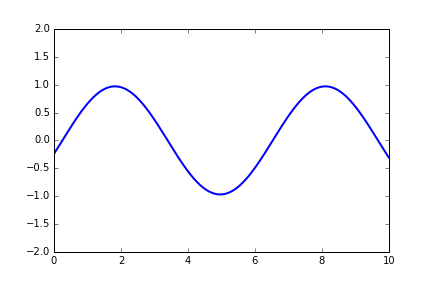
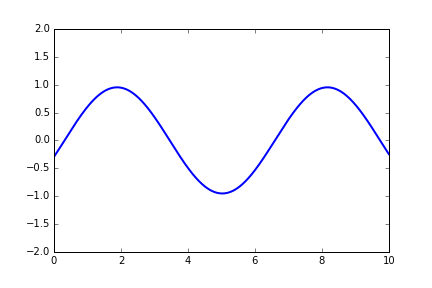
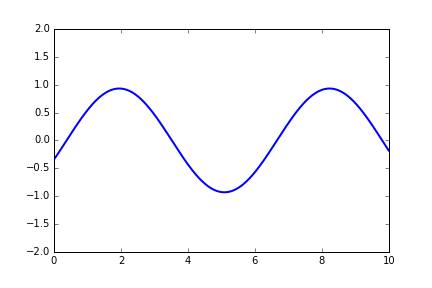
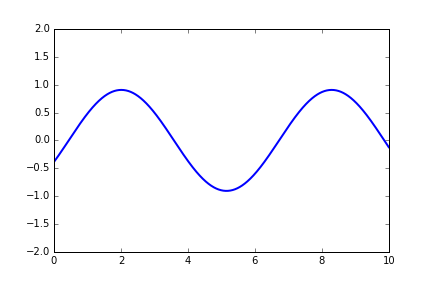
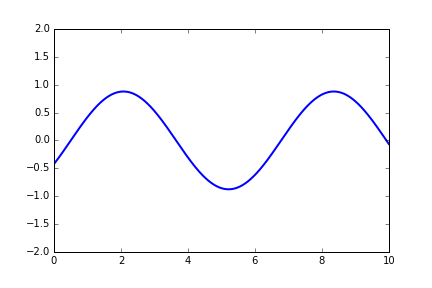
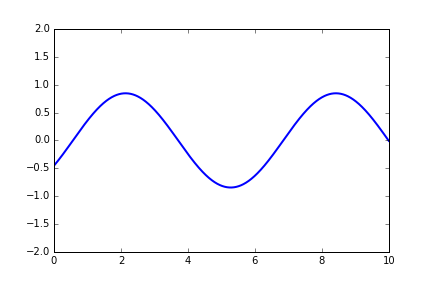
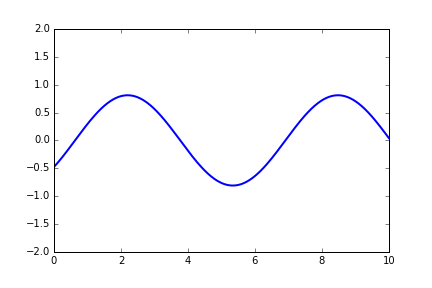
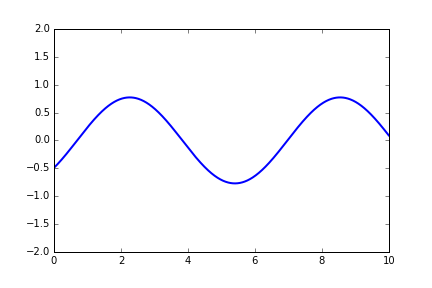
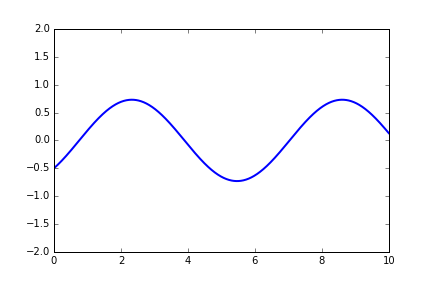
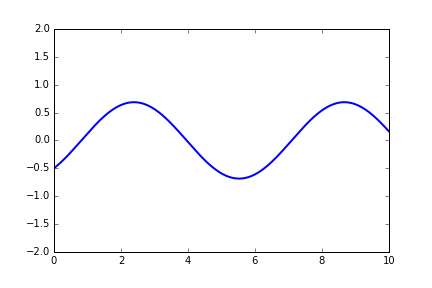
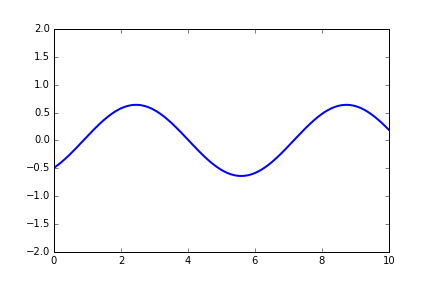
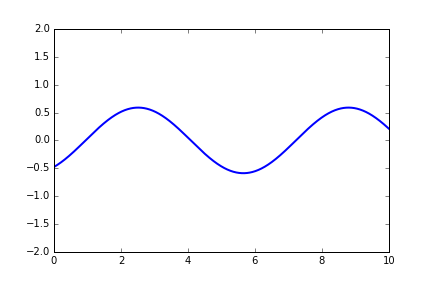
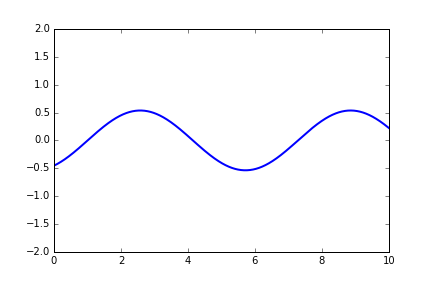
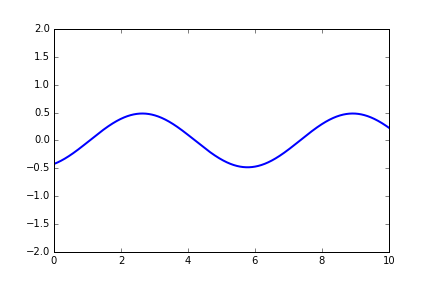
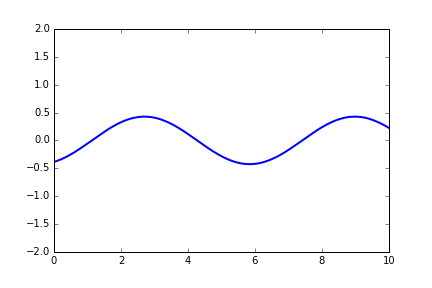
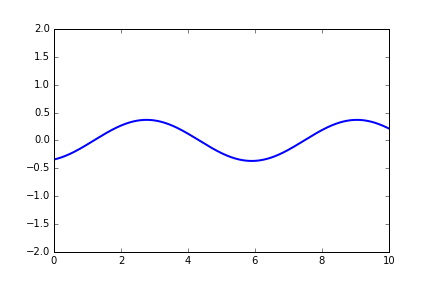
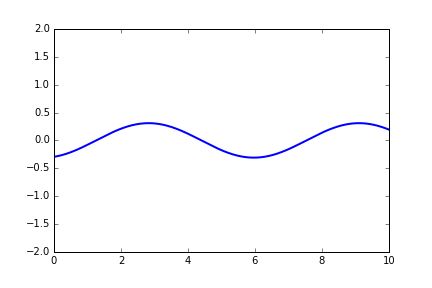
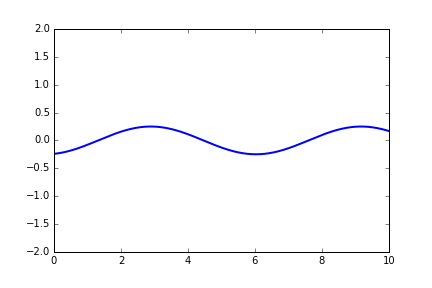
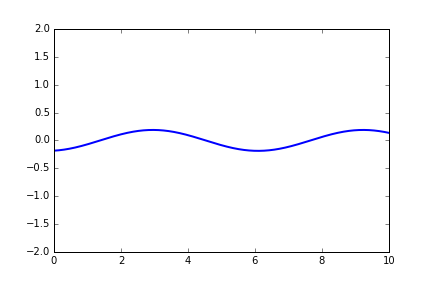
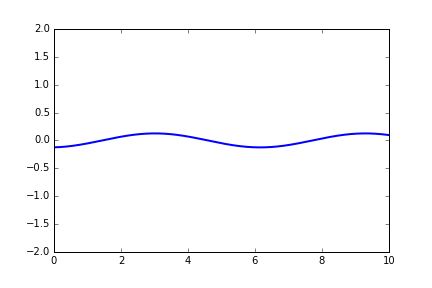
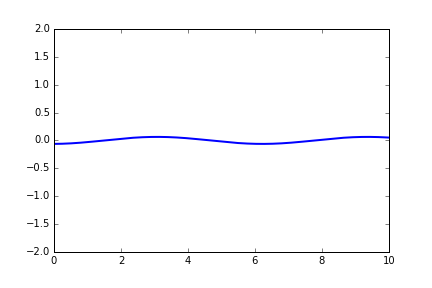
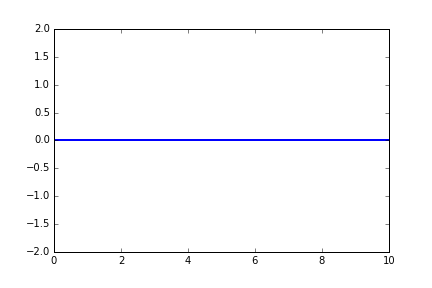
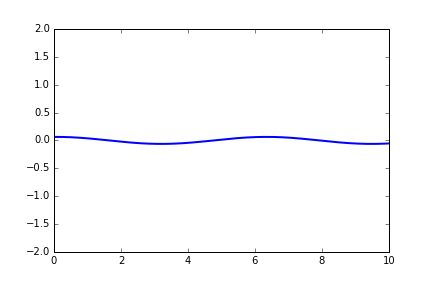
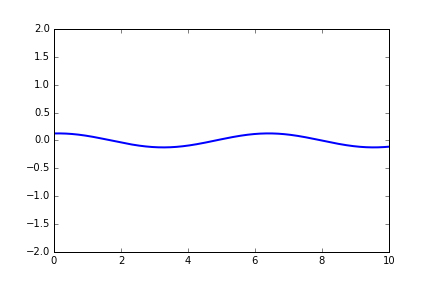
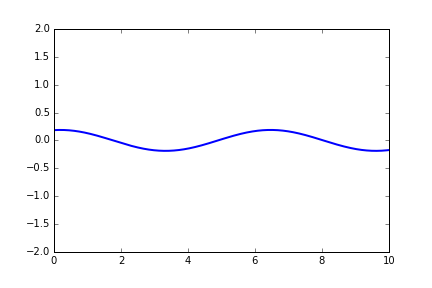
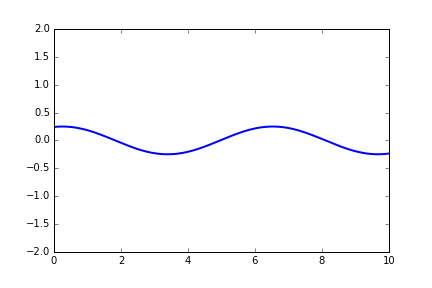
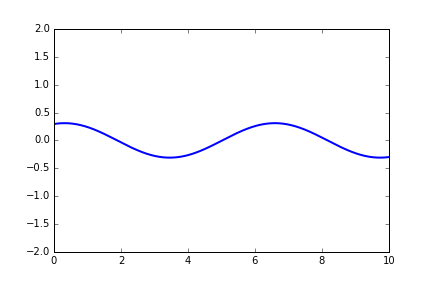
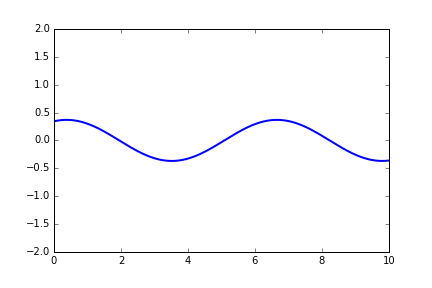
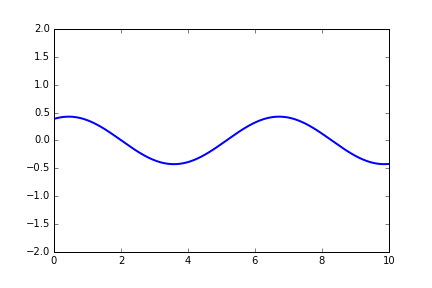
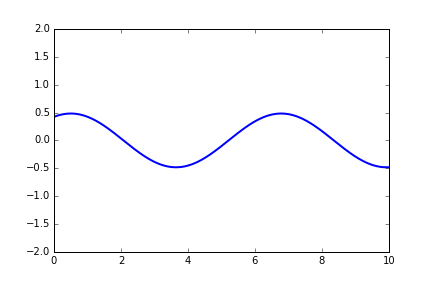
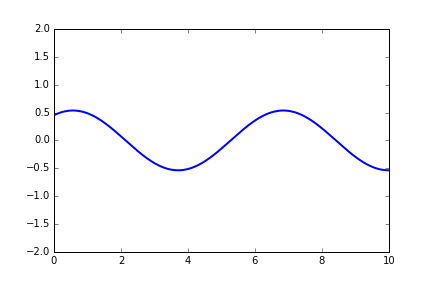
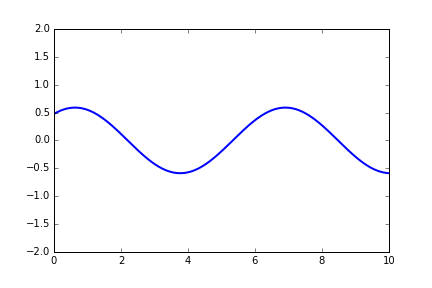
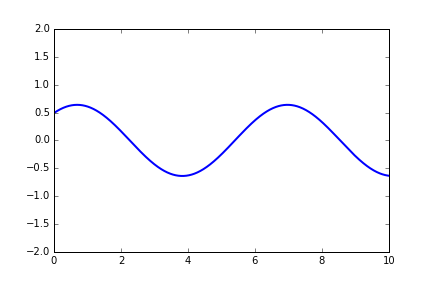
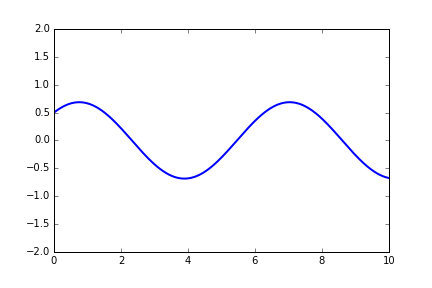
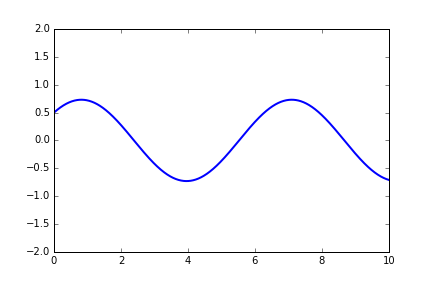
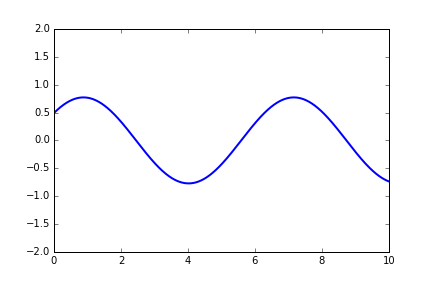
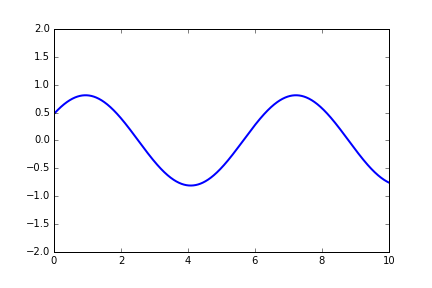
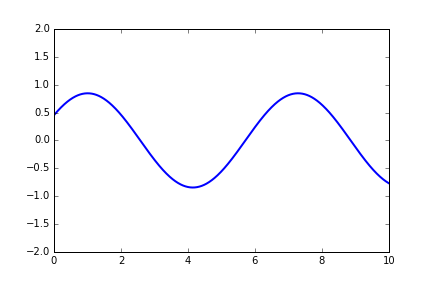
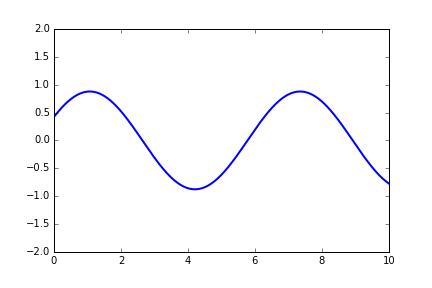
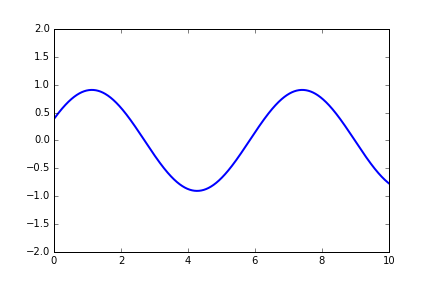
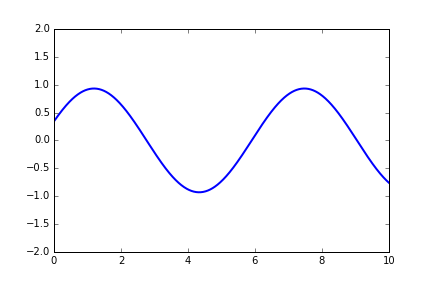
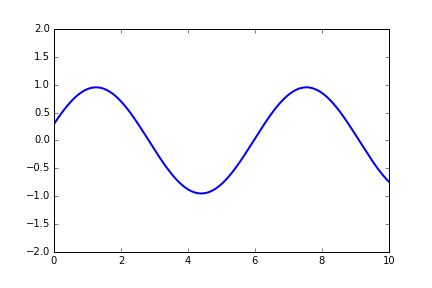
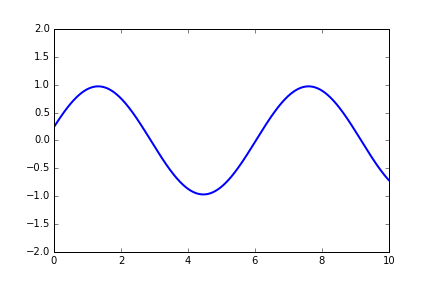
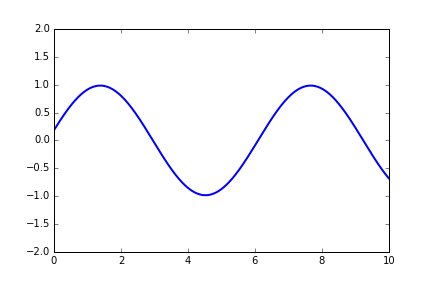
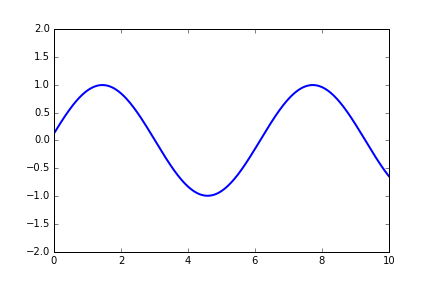
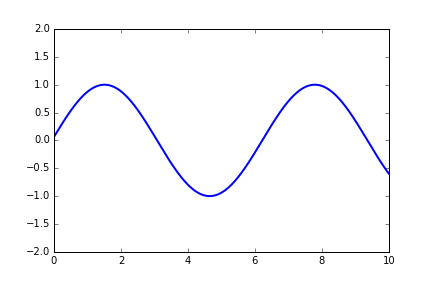
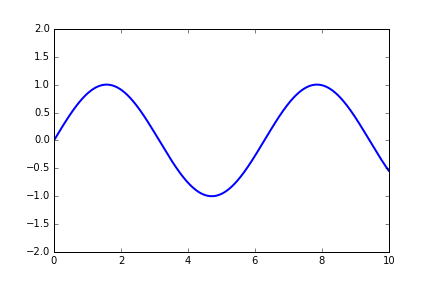
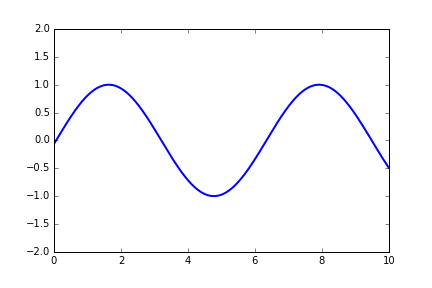
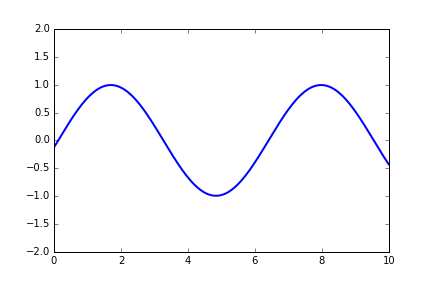
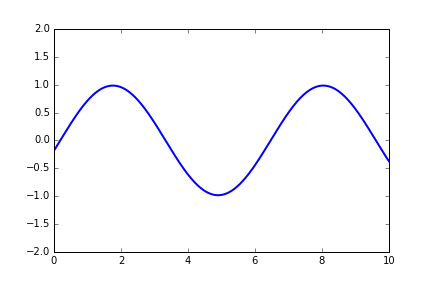
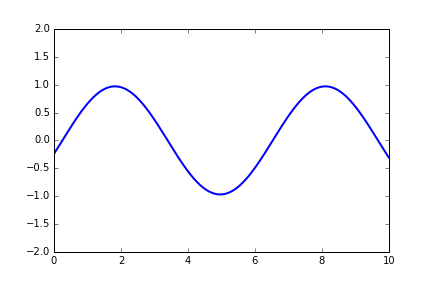
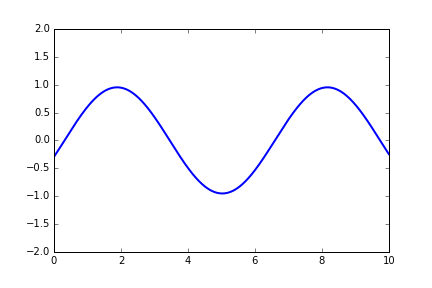
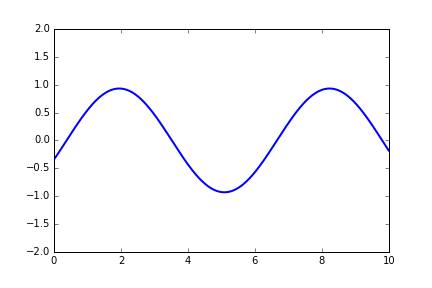
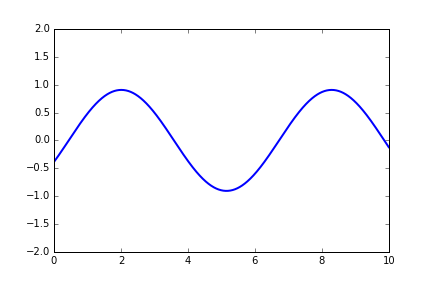
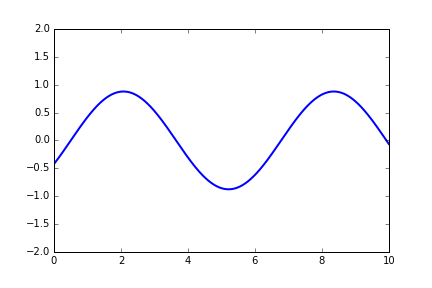
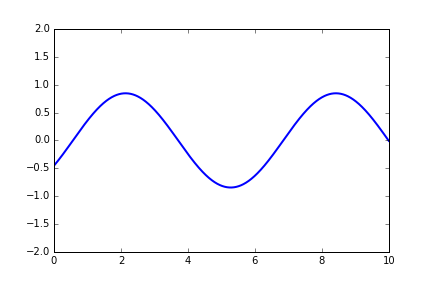
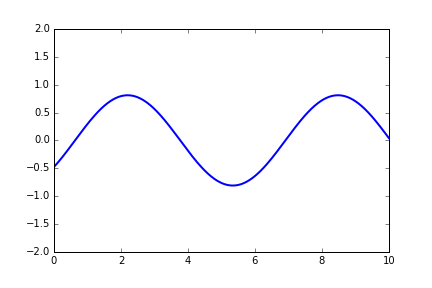
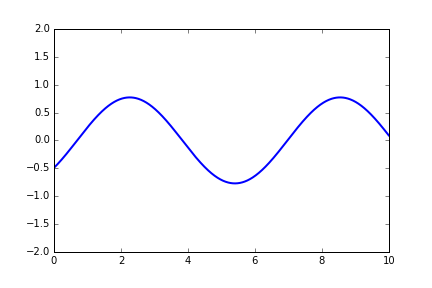
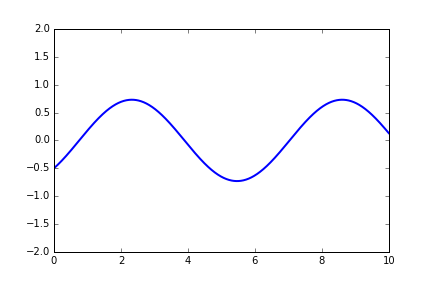
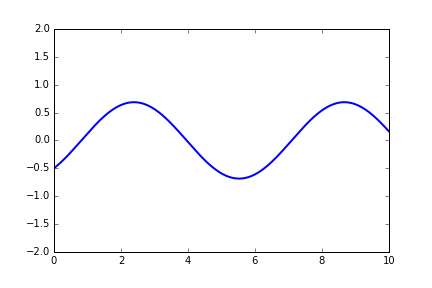
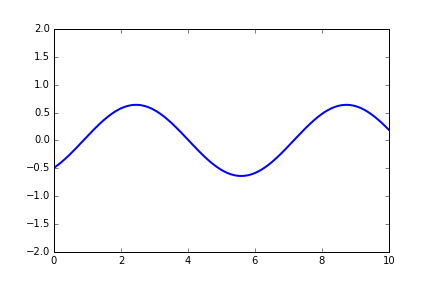
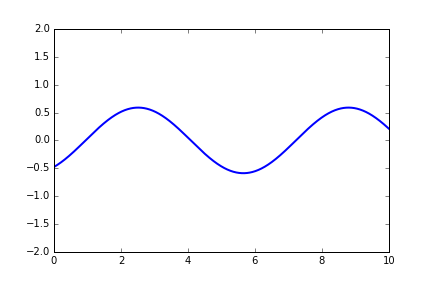
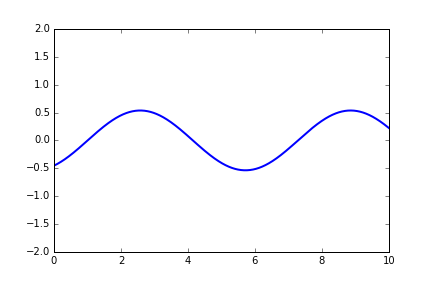
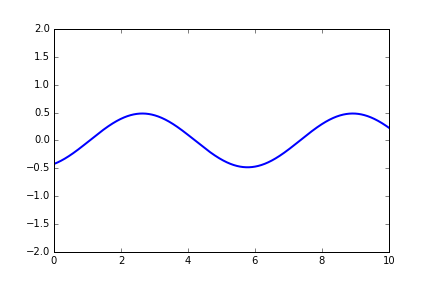
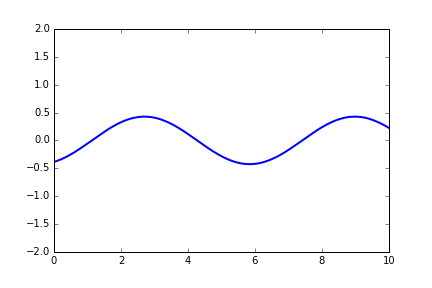
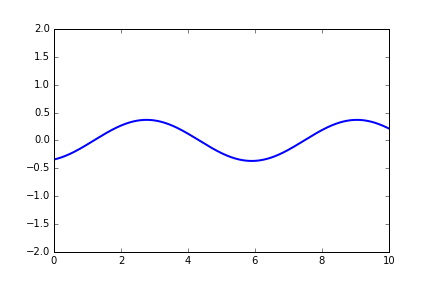
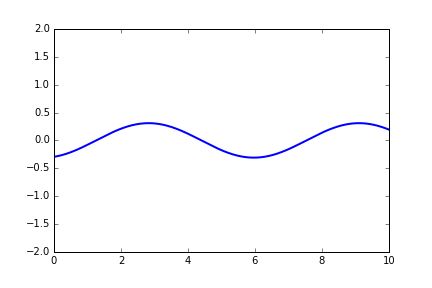
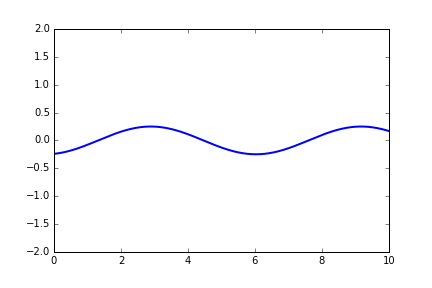
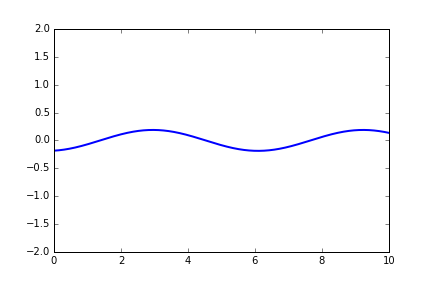
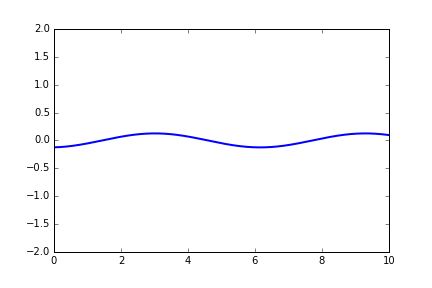
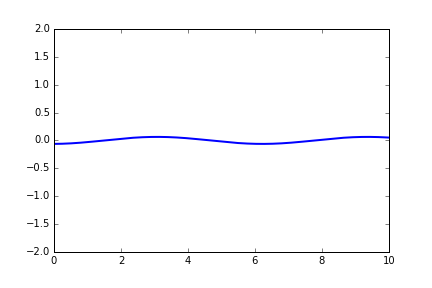
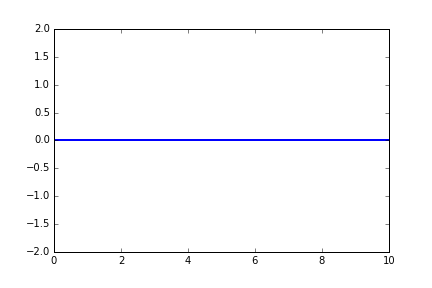
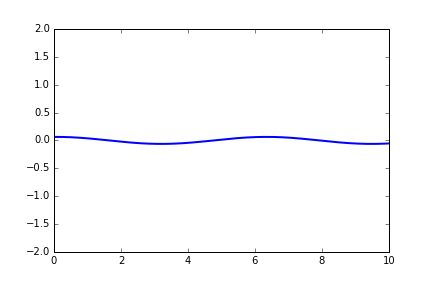
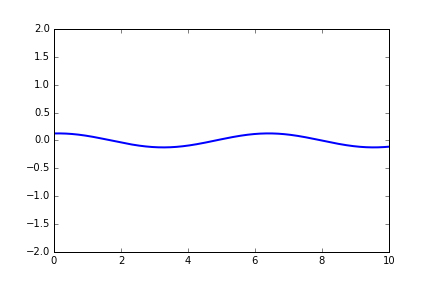
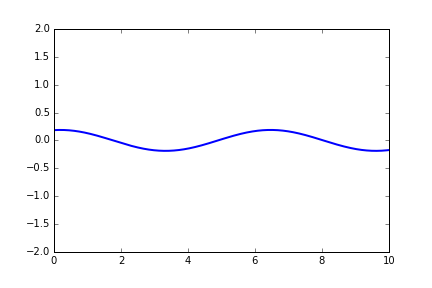
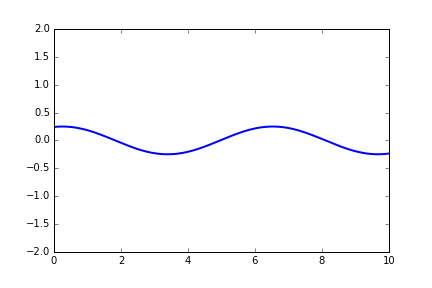
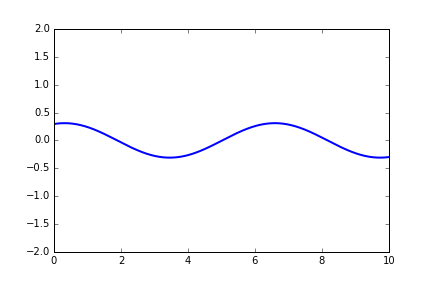
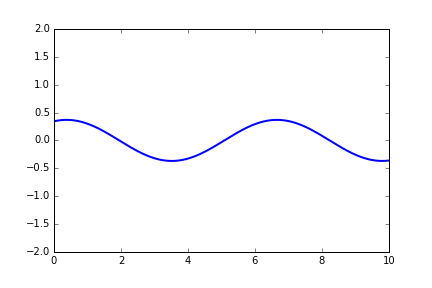
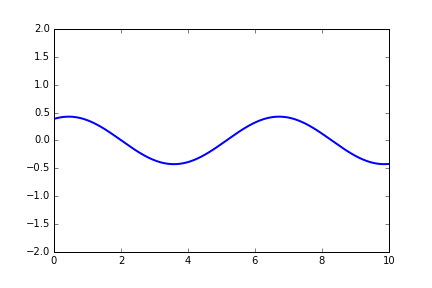
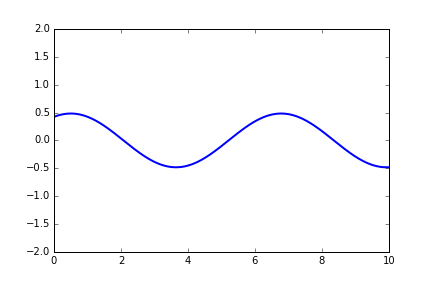
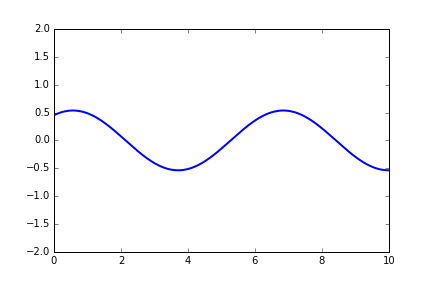
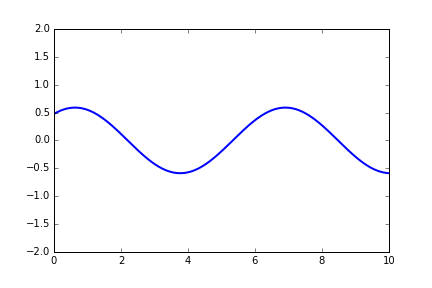
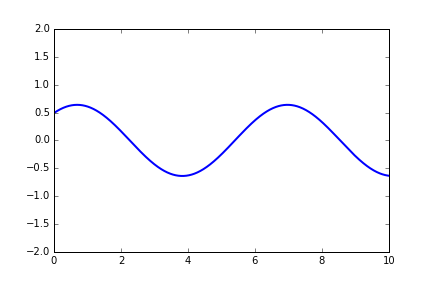
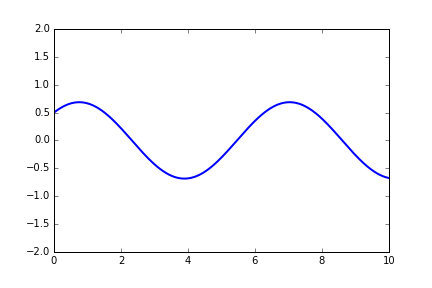
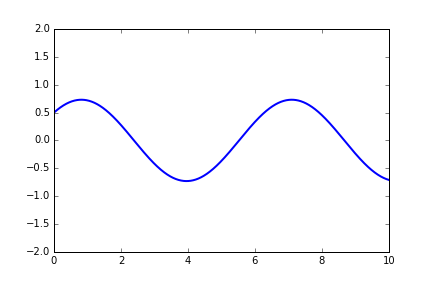
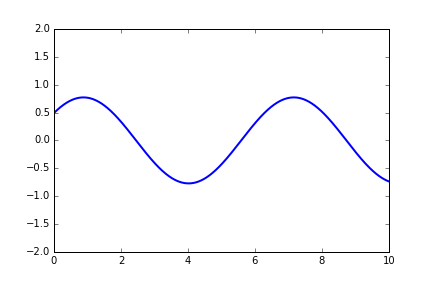
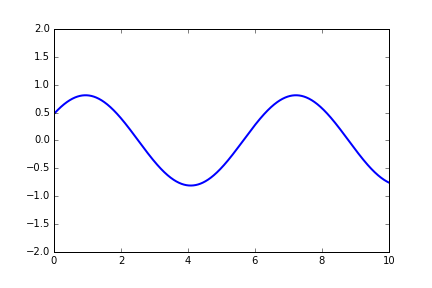
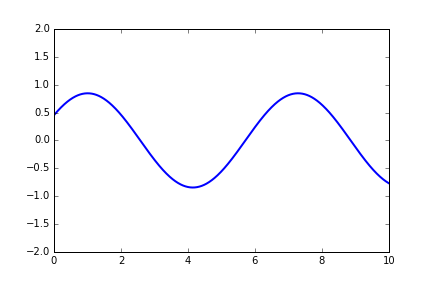
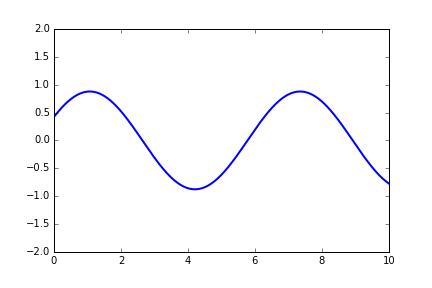
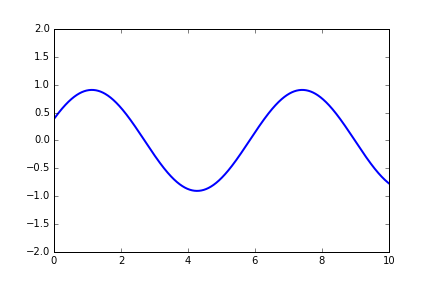
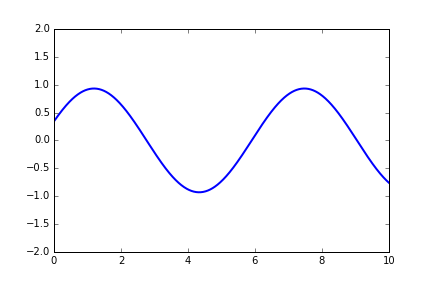
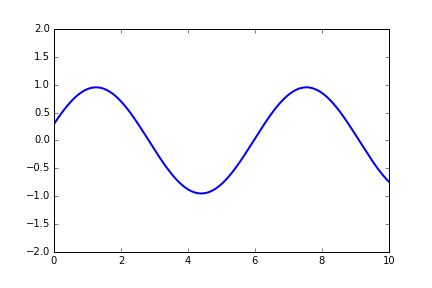
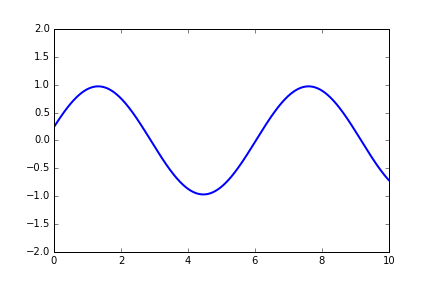
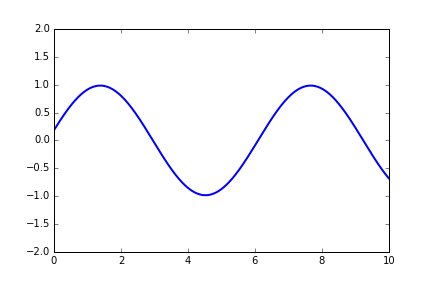
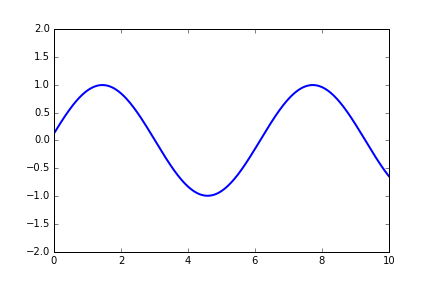
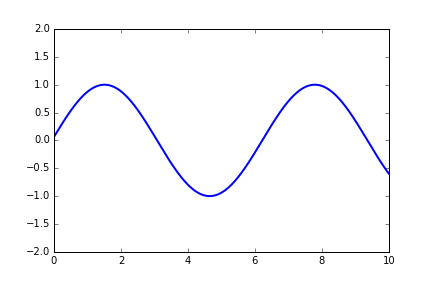

In [13]:
import JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x = np.linspace(0, 10, 1000)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, np.cos(i * 0.02 * np.pi) * np.sin(x - i * 0.02 * np.pi))
    return line,

animation.FuncAnimation(fig, animate, init_func=init, 
                        frames=100, interval=20, blit=True)